# <span style="color: green;"> Probability Matching </span>
"Probability Matching" refers to a decision-making strategy where individuals choose options in proportion to their likelihood of ocurring, which mirrors the probability distribution of possible outcomes in a given situation.

### <span style="color: green;"> Tossing a Coin </span>
In this Jupyter Notebook, we perform a simple game of betting on the outcome of tossing a biased coin. Using a learning agent, we gain an edge by basing the betting strategy on the previous outcome they observe. 

We record all the observed outcomes and randomly choose from the set of all previous outcomes. The bias is reflected in the number of times the agent randomly bets on heads as compared to tails.

The agent can simply do better by simply betting on the most likely outcome as derived from past results.

In [1]:
# importing the libraries
from collections import Counter

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng



In [ ]:
# instantiating a random number generator object
rng = default_rng(seed=100)

# defining the state space
state_space = [1, 1, 1, 1, 0]

In [3]:
# defining the epoch function
def epoch(n):

    # total reward and action space
    total_reward = 0
    action_space = [0, 1]

    # a for loop for n iterations
    for _ in range(n):

        # stores a dictionary of 1 and 0 occurrences
        frequency = Counter(action_space)

        # most chosen action and a coin toss
        action_chosen = frequency.most_common()[0][0]
        random_coin_toss = rng.choice(state_space)

        # appending the total reward
        if action_chosen == random_coin_toss:
            total_reward += 1

        # update of action space with highest frequency
        action_space.append(random_coin_toss)

    # returning the total reward
    return total_reward


In [4]:
# multiple sequences of bets in a numpy array
rl = np.array([epoch(100) for _ in range(250)])

# selecting the first ten elements
print("First Ten Elements: ", rl[:10])

# printing out the mean
print("The Mean: ", rl.mean())

First Ten Elements:  [74 83 81 74 80 81 75 79 84 77]
The Mean:  79.156


<>:13: SyntaxWarning: invalid escape sequence '\G'
<>:13: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chowdhuryj\AppData\Local\Temp\ipykernel_4016\299825666.py:13: SyntaxWarning: invalid escape sequence '\G'
  plt.savefig("C:\GitHub\ReinforcementFinance\ch_01\plots\ProbabilityMatching.png")


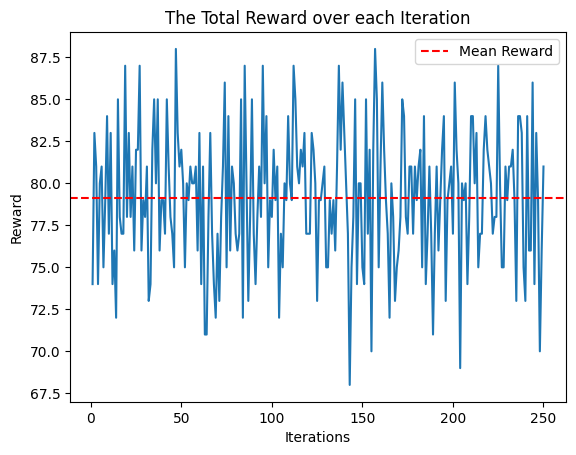

In [13]:
# storing a list of iterations
iterations = []
for i in range(1, 251):
    iterations.append(i)

# plotting the graph
plt.plot(iterations, rl)
plt.axhline(y=rl.mean(), color="r", linestyle="--", label="Mean Reward")
plt.title("The Total Reward over each Iteration")
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend()
plt.savefig("C:\GitHub\ReinforcementFinance\ch_01\plots\ProbabilityMatching.png")

# displaying the plot
plt.show()

<>:58: SyntaxWarning: invalid escape sequence '\G'
<>:58: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chowdhuryj\AppData\Local\Temp\ipykernel_4016\3268376984.py:58: SyntaxWarning: invalid escape sequence '\G'
  plt.savefig(f"C:\GitHub\ReinforcementFinance\ch_01\plots\RewardStateSpace{state}.png")


Mean Reward is:  100.0 



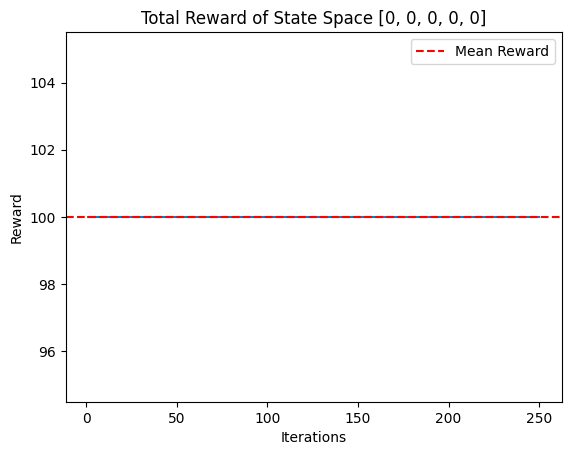

Mean Reward is:  79.928 



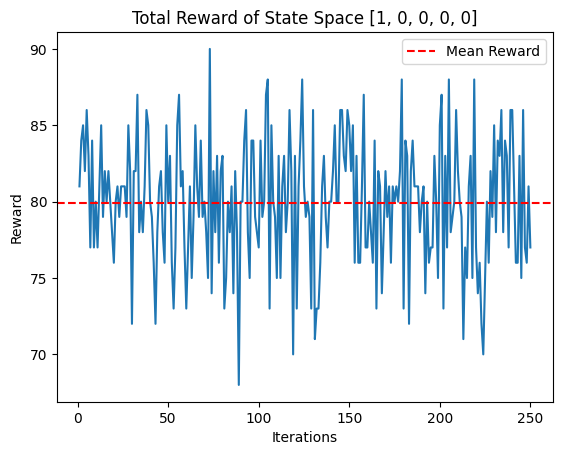

Mean Reward is:  57.716 



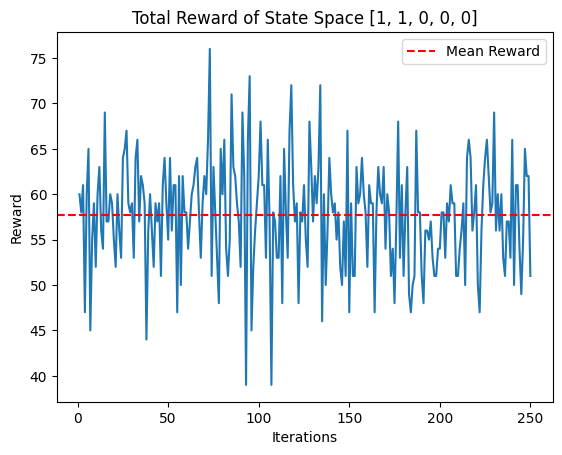

Mean Reward is:  57.268 



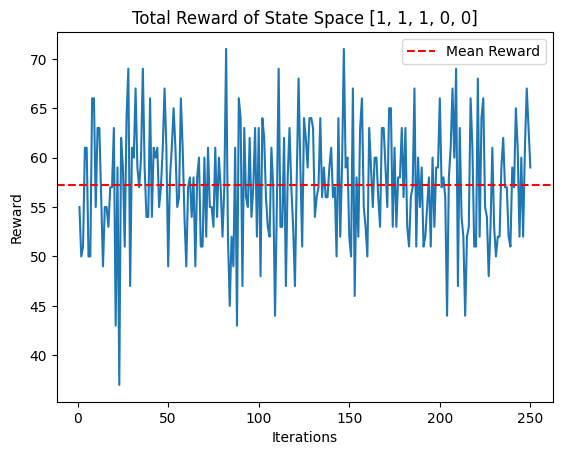

Mean Reward is:  79.0 



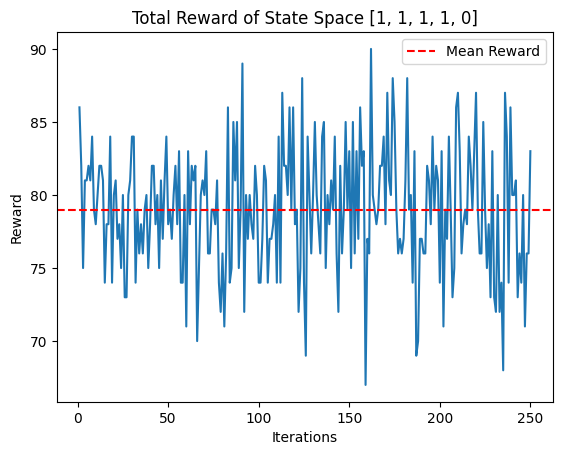

Mean Reward is:  99.0 



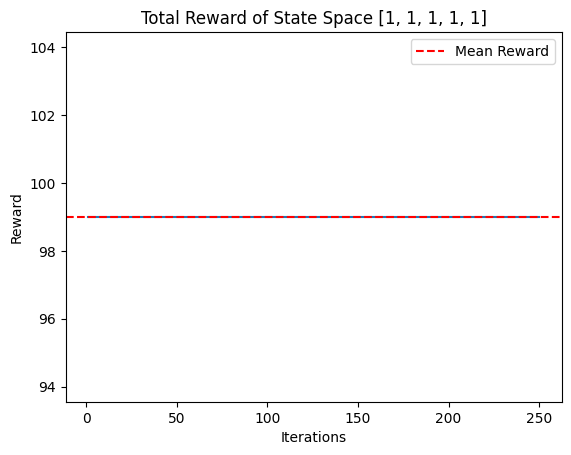

In [25]:
# defining the different state spaces
state_spaces = [[0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 1, 0, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]

# instantiating a random number generator object
rng = default_rng(seed=100)

# for loop of the states
for state in state_spaces:

    # defining the epoch function
    def epoch(n):

        # total reward and action space
        total_reward = 0
        action_space = [0, 1]

        # a for loop for n iterations
        for _ in range(n):

            # stores a dictionary of 1 and 0 occurrences
            frequency = Counter(action_space)

            # most chosen action and a coin toss
            action_chosen = frequency.most_common()[0][0]
            random_coin_toss = rng.choice(state)

            # appending the total reward
            if action_chosen == random_coin_toss:
                total_reward += 1

            # update of action space with highest frequency
            action_space.append(random_coin_toss)

        # returning the total reward
        return total_reward
    
    # multiple sequences of bets in a numpy array
    rl = np.array([epoch(100) for _ in range(250)])

    # storing a list of iterations
    iterations = []
    for i in range(1, 251):
        iterations.append(i)

    # plotting the graph
    plt.plot(iterations, rl)
    print("Mean Reward is: ", rl.mean(), "\n")
    plt.axhline(y=rl.mean(), color="r", linestyle="--", label="Mean Reward")
    plt.title("The Total Reward over each Iteration")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.legend()

    # setting up the title
    plt.title(f"Total Reward of State Space {state}")

    # saving the figure
    plt.savefig(f"C:\GitHub\ReinforcementFinance\ch_01\plots\RewardStateSpace{state}.png")

    # displaying the plot
    plt.show()
    